### Identifying Bias

#### **Method 1: Independent Demographic Parity**

#### STEP 1.1: Define features

In [100]:
import pandas as pd

df = pd.read_csv('PCA_final.csv')

X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death',
            'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population']]
y = df['inc_case']
sensitive_feature = df['liberalism']

#### STEP 1.2: Calculate Demographic Parity using StratifiedKFold

##### StratifiedKFold
1. Fixed random seed: "random_state=42" ensures that the code produces the same results each time it is ran.
2. Stratified Cross-Validation: ensures that each fold represents the distribution of liberal and conservative states of the overall dataset, making the evaluation results reliable.

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, true values, and sensitive features for each fold
y_pred_list = []
y_true_list = []
sensitive_feature_list = []

# List to store MAE for liberal and conservative states in each fold
liberal_mae_list = []
conservative_mae_list = []

# Function to calculate coverage and bias
def calculate_coverage_bias(y_true, y_pred):
    bias = (y_pred - y_true).mean()
    coverage = ((y_pred >= y_true.min()) & (y_pred <= y_true.max())).mean()
    return coverage, bias

# Loop through each fold of StratifiedKFold
for train_index, test_index in skf.split(X, sensitive_feature):

    # Split the data into training and testing sets for this fold
    # Ensures that each fold has a similar proportion of liberal and conservative states as the overall dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train RandomForestRegressor on the training data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    y_pred_list.append(y_pred)
    y_true_list.append(y_test)
    sensitive_feature_list.append(sensitive_feature.iloc[test_index])

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into liberal and conservative states
    liberal_indices = X_test[sensitive_feature.iloc[test_index] == 1].index
    conservative_indices = X_test[sensitive_feature.iloc[test_index] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 37007.8884747191
Mean MAE for conservative (red) states: 21599.283916290275
Difference in MAE (liberal - conservative): 15408.604558428822


In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, true values, and sensitive features for each fold
y_pred_list = []
y_true_list = []
sensitive_feature_list = []

# List to store MAE for liberal and conservative states in each fold
liberal_mae_list = []
conservative_mae_list = []

# Function to calculate coverage and bias
def calculate_coverage_bias(y_true, y_pred):
    bias = (y_pred - y_true).mean()
    coverage = ((y_pred >= y_true.min()) & (y_pred <= y_true.max())).mean()
    return coverage, bias

# Loop through each fold of StratifiedKFold
for train_index, test_index in skf.split(X, sensitive_feature):

    # Split the data into training and testing sets for this fold
    # Ensures that each fold has a similar proportion of liberal and conservative states as the overall dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train RandomForestRegressor on the training data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    y_pred_list.append(y_pred)
    y_true_list.append(y_test)
    sensitive_feature_list.append(sensitive_feature.iloc[test_index])

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into liberal and conservative states
    liberal_indices = X_test[sensitive_feature.iloc[test_index] == 1].index
    conservative_indices = X_test[sensitive_feature.iloc[test_index] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 37007.8884747191
Mean MAE for conservative (red) states: 21599.283916290275
Difference in MAE (liberal - conservative): 15408.604558428822


#### STEP 1.4: Calculate differences between evaluation metrics between liberal (blue) and conservative (red) states

In [103]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 18884046674.333153
Mean RMSE: 124300.13073553478
Mean Coverage: 0.9909346271705821
Mean Bias: -5965.695497701736

Metrics for Conservative (Red) States:
Mean MSE: 3768320938.00295
Mean RMSE: 56221.83120266702
Mean Coverage: 0.9926528154170431
Mean Bias: 7709.711258657029


In [104]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.888405e+10,3.768321e+09,1.511573e+10
1,RMSE,1.243001e+05,5.622183e+04,6.807830e+04
2,Coverage,9.909346e-01,9.926528e-01,-1.718188e-03
3,Bias,-5.965695e+03,7.709711e+03,-1.367541e+04


/var/folders/cr/_q1why214gg5d4kb6_zzn9mr0000gn/T/ipykernel_17326/2823515739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_mse, mean_conservative_mse], ax=axes[0, 0], palette="Blues_d")
/var/folders/cr/_q1why214gg5d4kb6_zzn9mr0000gn/T/ipykernel_17326/2823515739.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_rmse, mean_conservative_rmse], ax=axes[0, 1], palette="Greens_d")
/var/folders/cr/_q1why214gg5d4kb6_zzn9mr0000gn/T/ipykernel_17326/2823515739.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

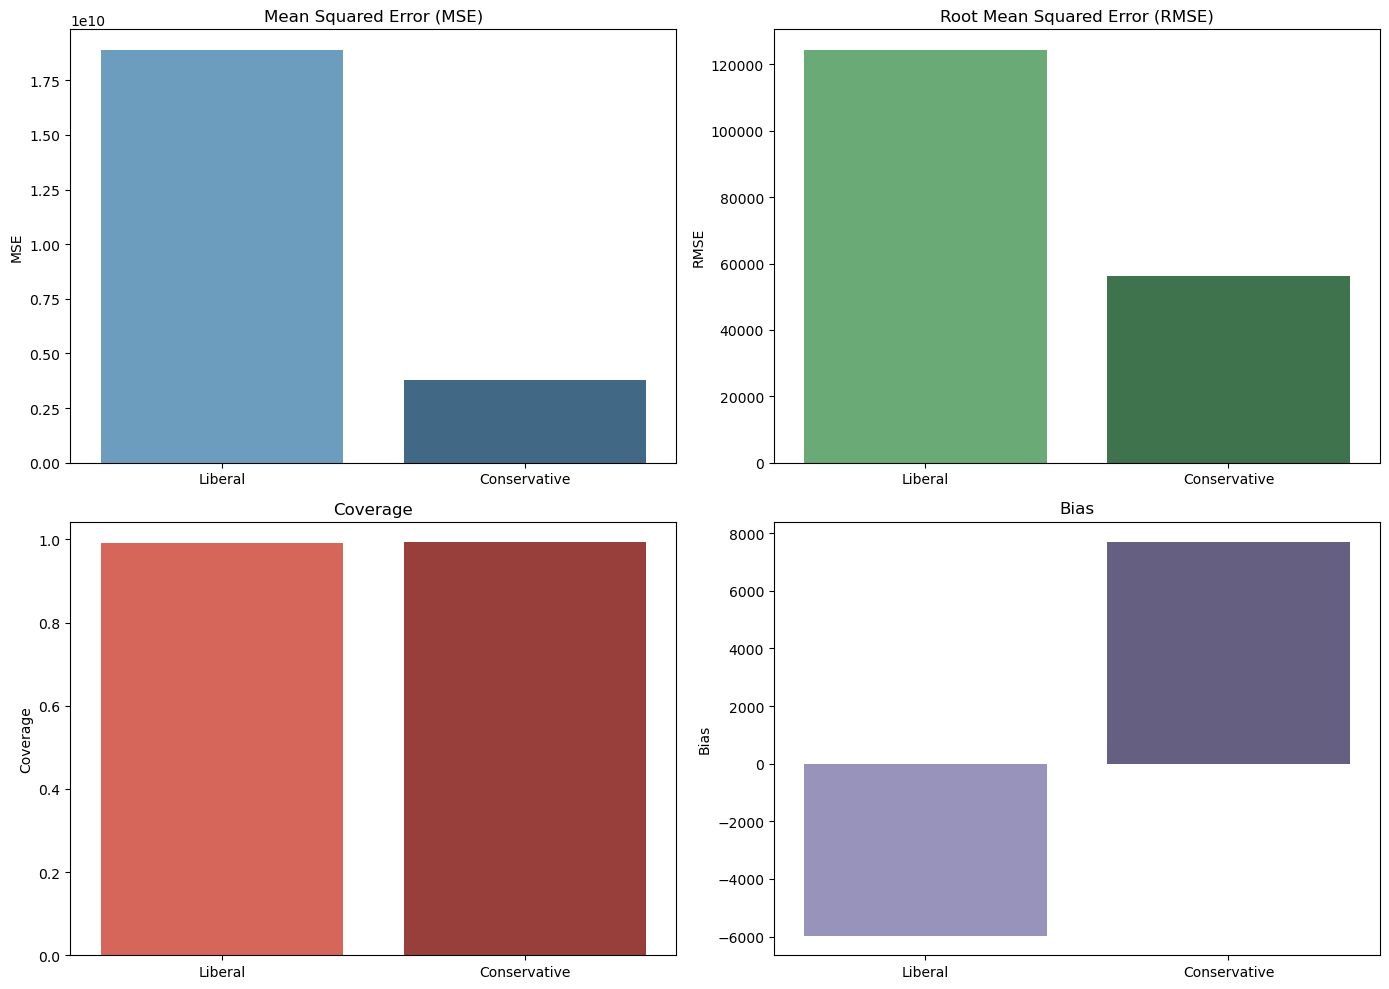

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot MSE
sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_mse, mean_conservative_mse], ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')

# Plot RMSE
sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_rmse, mean_conservative_rmse], ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')

# Plot Coverage
sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_coverage, mean_conservative_coverage], ax=axes[1, 0], palette="Reds_d")
axes[1, 0].set_title('Coverage')
axes[1, 0].set_ylabel('Coverage')

# Plot Bias
sns.barplot(x=['Liberal', 'Conservative'], y=[mean_liberal_bias, mean_conservative_bias], ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title('Bias')
axes[1, 1].set_ylabel('Bias')

# Adjust layout
plt.tight_layout()
plt.show()

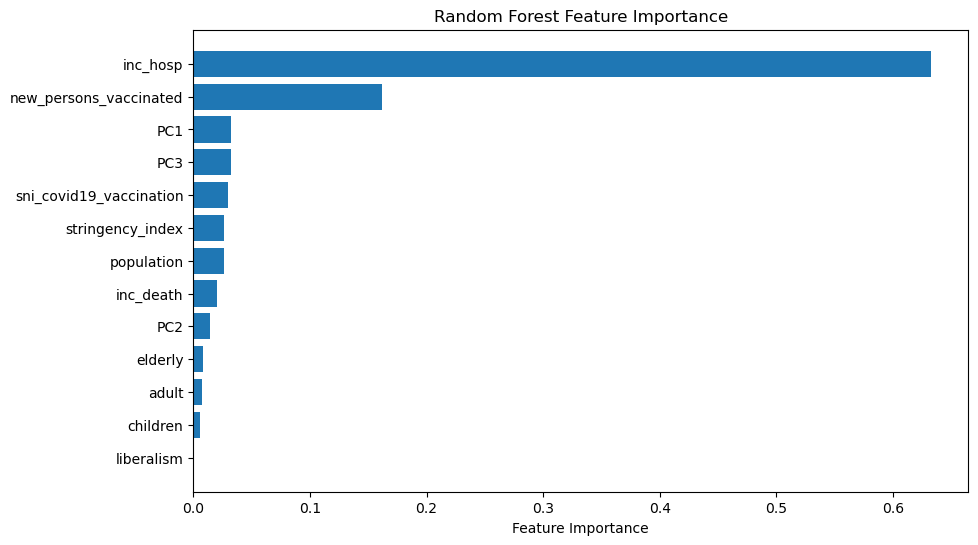

In [106]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

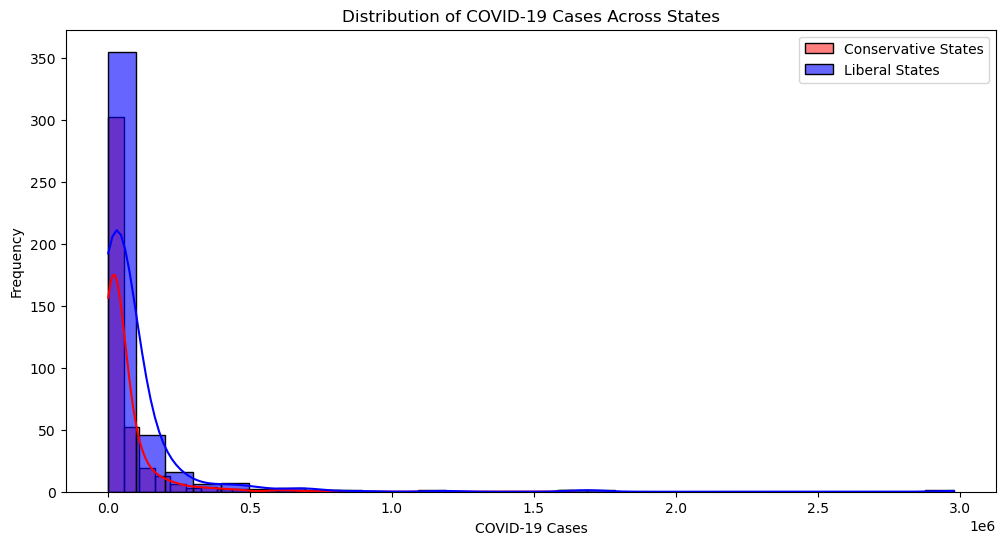

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

conservative_states = df[df['liberalism'] == 0]
sns.histplot(conservative_states['inc_case'], color='red', label='Conservative States', kde=True, bins=30)

liberal_states = df[df['liberalism'] == 1]
sns.histplot(liberal_states['inc_case'], color='blue', label='Liberal States', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of COVID-19 Cases Across States')
plt.xlabel('COVID-19 Cases')
plt.ylabel('Frequency')
plt.legend()

plt.show()

#### Method 2: Conditional Independent Demographic Parity

#### STEP 2.1: Create an interaction variable

In [108]:
df['int:liberalism_stringency'] = df['liberalism'] * df['stringency_category']

display(df)

,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,...,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,PC1,PC2,PC3,int:liberalism_stringency
0,2021-01,Alabama,112124.0,1.371155,1.584112,0.032568,0.0,-0.231951,-0.237370,-0.199080,...,-1.239613,-1.010675,-0.710112,-0.403022,1.149867,-0.215768,-2.396417,-0.262114,-0.155315,0.0
1,2021-01,Alaska,8604.0,-0.537244,-0.539897,1.080654,1.0,-0.755107,-0.762349,-0.849780,...,-1.399782,-0.904952,-1.316842,-0.913240,1.939921,-0.215768,-3.198032,0.417148,0.067946,2.0
2,2021-01,Arizona,262750.0,2.366892,2.944381,1.492130,1.0,0.135100,0.059541,0.166176,...,-1.785018,-1.153541,-0.303895,-1.669627,2.105210,-0.215768,-3.498723,0.562954,-1.172292,3.0
3,2021-01,Arkansas,80418.0,0.281742,0.466371,0.247917,0.0,-0.458891,-0.484278,-0.474223,...,-1.283933,-0.874682,-0.393830,-0.124464,1.092664,-0.215768,-2.131540,-0.503742,-0.223589,0.0
4,2021-01,California,1180351.0,10.206922,11.821532,1.098149,1.0,4.449814,4.491572,4.087480,...,-2.012602,-1.050743,-1.861609,-2.430059,2.871310,-0.215768,-5.161720,1.488413,-0.310348,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2022-05,Virginia,14020.0,-0.454363,-0.552701,-1.122189,1.0,0.236426,0.291841,0.234678,...,0.399280,-0.152014,-0.274495,0.714270,-0.306844,-0.098333,0.267299,-0.541798,0.473900,1.0
845,2022-05,Washington,15606.0,-0.449159,-0.567765,-1.059743,1.0,0.072436,0.117492,0.083914,...,0.231851,0.543568,0.010394,0.423376,-1.012987,-0.098333,1.036421,-0.188725,0.518222,1.0
846,2022-05,West Virginia,1726.0,-0.538401,-0.567765,-1.298756,0.0,-0.653301,-0.637960,-0.615981,...,0.491594,-0.259044,1.600476,1.075490,-1.061277,-0.098333,1.681943,-1.320040,-0.813490,0.0
847,2022-05,Wisconsin,12420.0,-0.469590,-0.547429,-1.243454,0.0,-0.126976,-0.121213,-0.076975,...,1.396498,1.036107,0.425484,1.386363,-1.342873,-0.098333,2.599836,-0.460601,0.817416,0.0


#### STEP 2.2: Define features

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_category', 'inc_death',
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population', 'int:liberalism_stringency']]
y = df['inc_case']
sensitive_feature = df['liberalism']

#### STEP 2.4: Calculate Demographic Parity using StratifiedKFold

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, true values, and sensitive features for each fold
y_pred_list = []
y_true_list = []
X_test_list = []
sensitive_feature_list = []

# List to store MAE for liberal and conservative states in each fold
liberal_mae_list = []
conservative_mae_list = []

# Loop through each fold of StratifiedKFold
for train_index, test_index in skf.split(X, sensitive_feature):

    # Split the data into training and testing sets for this fold
    # Ensures that each fold has a similar proportion of liberal and conservative states as the overall dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Store X_test for this fold
    X_test_list.append(X_test)

    # Train RandomForestRegressor on the training data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    y_pred_list.append(y_pred)
    y_true_list.append(y_test)
    sensitive_feature_list.append(sensitive_feature.iloc[test_index])

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into liberal and conservative states
    liberal_indices = X_test[sensitive_feature.iloc[test_index] == 1].index
    conservative_indices = X_test[sensitive_feature.iloc[test_index] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 37700.819868232895
Mean MAE for conservative (red) states: 21556.344820535982
Difference in MAE (liberal - conservative): 16144.475047696913


#### STEP 2.5: Calculate differences between evaluation metrics between liberal (blue) and conservative (red) states

In [111]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 18878008587.626137
Mean RMSE: 124799.48262667684
Mean Coverage: 0.9909346271705821
Mean Bias: -5547.3610280898865

Metrics for Conservative (Red) States:
Mean MSE: 3551914668.975053
Mean RMSE: 54093.50750707162
Mean Coverage: 0.9926528154170431
Mean Bias: 8337.324202047577


In [112]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.887801e+10,3.551915e+09,1.532609e+10
1,RMSE,1.247995e+05,5.409351e+04,7.070598e+04
2,Coverage,9.909346e-01,9.926528e-01,-1.718188e-03
3,Bias,-5.547361e+03,8.337324e+03,-1.388469e+04


#### STEP 2.6: Calculate the difference in evaluation metrics between liberal and conservative states based on the stringency index

In [113]:
import pandas as pd

# Interaction groups
interaction_groups = [
    (1, 1),
    (1, 2),
    (1, 3),
    (0, 1),
    (0, 2),
    (0, 3)
]

# Dictionary to store results for interaction groups
interaction_results = {group: {'y_true': [], 'y_pred': []} for group in interaction_groups}

# Loop through each fold's stored predictions and true values
for fold_index in range(len(y_true_list)):
    X_test = X_test_list[fold_index]
    y_test = y_true_list[fold_index]
    y_pred = y_pred_list[fold_index]

    # Store predictions and true values for interaction groups
    for liberalism, stringency in interaction_results.keys():
        group_mask = (X_test['liberalism'] == liberalism) & (X_test['stringency_category'] == stringency)
        interaction_results[(liberalism, stringency)]['y_true'].extend(y_test[group_mask].tolist())
        interaction_results[(liberalism, stringency)]['y_pred'].extend(y_pred[group_mask].tolist())

# Calculate metrics for interaction groups
interaction_metrics = []
for group, values in interaction_results.items():
    y_true = np.array(values['y_true'])
    y_pred = np.array(values['y_pred'])
    if len(y_true) > 0:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mse = mean_squared_error(y_true, y_pred)
        bias = (y_pred - y_true).mean()
        coverage = ((y_pred >= y_true.min()) & (y_pred <= y_true.max())).mean()
        interaction_metrics.append({
            'Political Affiliation': 'Liberal' if group[0] == 1 else 'Conservative',
            'Stringency Category': group[1],
            'RMSE': rmse,
            'MSE': mse,
            'Bias': bias,
            'Coverage': coverage
        })

# Convert interaction metrics to DataFrame
interaction_df = pd.DataFrame(interaction_metrics)

# Calculate the difference between liberal and conservative groups based on the stringency category
interaction_df['Diff_RMSE'] = interaction_df.groupby('Stringency Category')['RMSE'].diff()
interaction_df['Diff_MSE'] = interaction_df.groupby('Stringency Category')['MSE'].diff()
interaction_df['Diff_Bias'] = interaction_df.groupby('Stringency Category')['Bias'].diff()
interaction_df['Diff_Coverage'] = interaction_df.groupby('Stringency Category')['Coverage'].diff()

# Print the DataFrame
display(interaction_df)

,Political Affiliation,Stringency Category,RMSE,MSE,Bias,Coverage,Diff_RMSE,Diff_MSE,Diff_Bias,Diff_Coverage
0,Liberal,1,91411.902110,8.356136e+09,-7643.881739,1.000000,NaN,NaN,NaN,NaN
1,Liberal,2,211578.544768,4.476548e+10,-14318.862047,1.000000,NaN,NaN,NaN,NaN
2,Liberal,3,93859.373666,8.809582e+09,38846.829737,0.973684,NaN,NaN,NaN,NaN
3,Conservative,1,60739.355307,3.689269e+09,3663.211056,1.000000,-30672.546803,-4.666867e+09,11307.092795,0.000000
4,Conservative,2,51272.249024,2.628844e+09,20837.540645,0.989247,-160306.295744,-4.213664e+10,35156.402692,-0.010753
5,Conservative,3,87605.798572,7.674776e+09,29716.156667,0.916667,-6253.575094,-1.134806e+09,-9130.673070,-0.057018


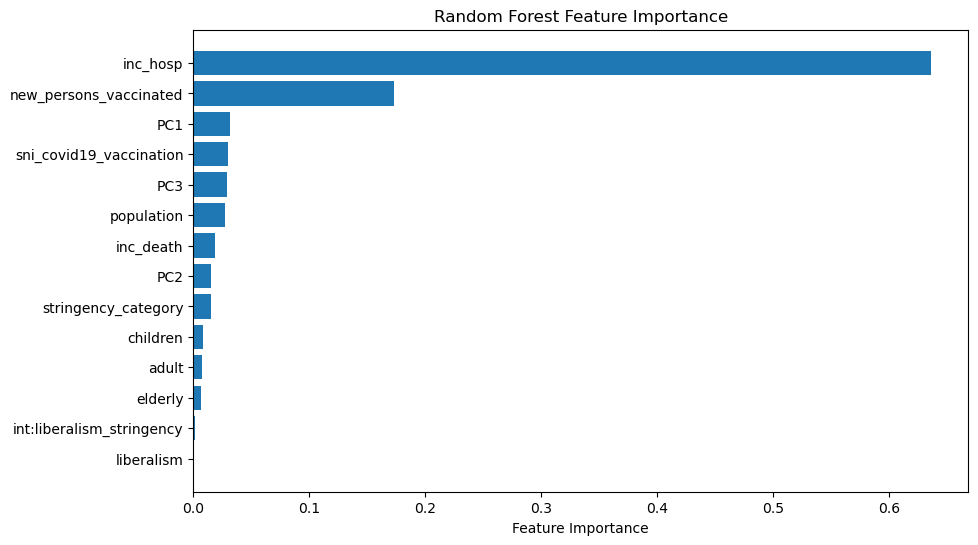

In [114]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

### Mitigating Bias

#### **Reweight model for each StratifiedKFold and calculate Demographic Parity** 

In [115]:
# Define features and target variable
X = df[['sni_covid19_vaccination', 'new_persons_vaccinated', 'stringency_index', 'inc_death',
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'population']]
y = df['inc_case']
sensitive_feature = df['liberalism']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions and true values for each fold
y_pred_list = []
y_true_list = []
liberal_mae_list = []
conservative_mae_list = []

for train_index, test_index in skf.split(X, sensitive_feature):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Calculate the sample weights based on the training data
    liberal_count_train = sum(df.loc[X_train.index]['liberalism'] == 1)
    conservative_count_train = sum(df.loc[X_train.index]['liberalism'] == 0)

    liberal_weight_train = (1 / liberal_count_train) ** 0.5
    conservative_weight_train = (1 / conservative_count_train) ** 0.5

    # Assign sample weights
    sample_weight_train = np.array([liberal_weight_train if label == 1 else conservative_weight_train for label in df.loc[X_train.index]['liberalism']])
    
    # Train RandomForestRegressor with reweighting
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train, sample_weight=sample_weight_train)
    y_pred = rf_model.predict(X_test)

    y_pred_list.append(y_pred)
    y_true_list.append(y_test)

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into red and blue states
    liberal_indices = X_test[df.loc[X_test.index]['liberalism'] == 1].index
    conservative_indices = X_test[df.loc[X_test.index]['liberalism'] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 36574.96578472932
Mean MAE for conservative (red) states: 21818.62274585968
Difference in MAE (liberal - conservative): 14756.34303886964


In [116]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 18823218467.21273
Mean RMSE: 123551.70903268065
Mean Coverage: 0.9909346271705821
Mean Bias: -6297.123315883553

Metrics for Conservative (Red) States:
Mean MSE: 3729943339.623912
Mean RMSE: 55757.90889630882
Mean Coverage: 0.9926528154170431
Mean Bias: 8385.05120174646


In [117]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.882322e+10,3.729943e+09,1.509328e+10
1,RMSE,1.235517e+05,5.575791e+04,6.779380e+04
2,Coverage,9.909346e-01,9.926528e-01,-1.718188e-03
3,Bias,-6.297123e+03,8.385051e+03,-1.468217e+04


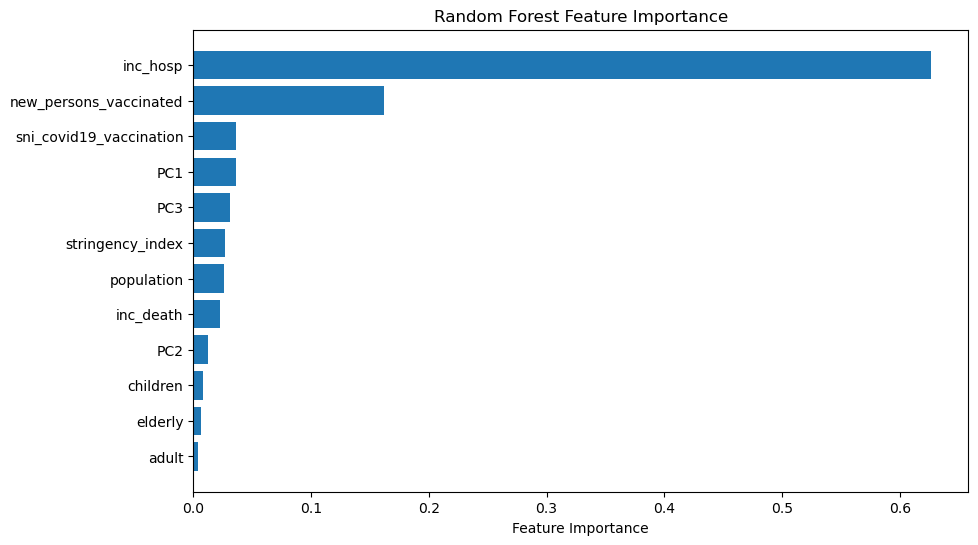

In [118]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### **EXTRA: Try to add interaction variables**

#### Create an interaction variable

In [119]:
df['int:liberalism_stringency'] = df['liberalism'] * df['stringency_category']
df['int:liberalsim_new_persons_vaccinated'] = df['liberalism'] * df['new_persons_vaccinated']
df['int:population__stringency'] = df['population'] * df['stringency_category']

display(df)

,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,...,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,PC1,PC2,PC3,int:liberalism_stringency,int:liberalsim_new_persons_vaccinated,int:population__stringency
0,2021-01,Alabama,112124.0,1.371155,1.584112,0.032568,0.0,-0.231951,-0.237370,-0.199080,...,-0.710112,-0.403022,1.149867,-0.215768,-2.396417,-0.262114,-0.155315,0.0,-0.000000,-0.431537
1,2021-01,Alaska,8604.0,-0.537244,-0.539897,1.080654,1.0,-0.755107,-0.762349,-0.849780,...,-1.316842,-0.913240,1.939921,-0.215768,-3.198032,0.417148,0.067946,2.0,-0.390949,-0.431537
2,2021-01,Arizona,262750.0,2.366892,2.944381,1.492130,1.0,0.135100,0.059541,0.166176,...,-0.303895,-1.669627,2.105210,-0.215768,-3.498723,0.562954,-1.172292,3.0,0.209453,-0.647305
3,2021-01,Arkansas,80418.0,0.281742,0.466371,0.247917,0.0,-0.458891,-0.484278,-0.474223,...,-0.393830,-0.124464,1.092664,-0.215768,-2.131540,-0.503742,-0.223589,0.0,-0.000000,-0.431537
4,2021-01,California,1180351.0,10.206922,11.821532,1.098149,1.0,4.449814,4.491572,4.087480,...,-1.861609,-2.430059,2.871310,-0.215768,-5.161720,1.488413,-0.310348,3.0,3.105572,-0.647305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2022-05,Virginia,14020.0,-0.454363,-0.552701,-1.122189,1.0,0.236426,0.291841,0.234678,...,-0.274495,0.714270,-0.306844,-0.098333,0.267299,-0.541798,0.473900,1.0,-0.437404,-0.098333
845,2022-05,Washington,15606.0,-0.449159,-0.567765,-1.059743,1.0,0.072436,0.117492,0.083914,...,0.010394,0.423376,-1.012987,-0.098333,1.036421,-0.188725,0.518222,1.0,-0.468413,-0.098333
846,2022-05,West Virginia,1726.0,-0.538401,-0.567765,-1.298756,0.0,-0.653301,-0.637960,-0.615981,...,1.600476,1.075490,-1.061277,-0.098333,1.681943,-1.320040,-0.813490,0.0,-0.000000,-0.098333
847,2022-05,Wisconsin,12420.0,-0.469590,-0.547429,-1.243454,0.0,-0.126976,-0.121213,-0.076975,...,0.425484,1.386363,-1.342873,-0.098333,2.599836,-0.460601,0.817416,0.0,-0.000000,-0.098333


#### Define features

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_category', 'inc_death',
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population', 
        'int:liberalism_stringency', 'int:liberalsim_new_persons_vaccinated', 'int:population__stringency']]
y = df['inc_case']
sensitive_feature = df['liberalism']

#### Calculate Demographic Parity using StratifiedKFold

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, true values, and sensitive features for each fold
y_pred_list = []
y_true_list = []
X_test_list = []
sensitive_feature_list = []

# List to store MAE for liberal and conservative states in each fold
liberal_mae_list = []
conservative_mae_list = []

# Loop through each fold of StratifiedKFold
for train_index, test_index in skf.split(X, sensitive_feature):

    # Split the data into training and testing sets for this fold
    # Ensures that each fold has a similar proportion of liberal and conservative states as the overall dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Store X_test for this fold
    X_test_list.append(X_test)

    # Train RandomForestRegressor on the training data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    y_pred_list.append(y_pred)
    y_true_list.append(y_test)
    sensitive_feature_list.append(sensitive_feature.iloc[test_index])

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into liberal and conservative states
    liberal_indices = X_test[sensitive_feature.iloc[test_index] == 1].index
    conservative_indices = X_test[sensitive_feature.iloc[test_index] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 38081.53523135853
Mean MAE for conservative (red) states: 21690.977373080394
Difference in MAE (liberal - conservative): 16390.557858278138


#### Calculate differences between evaluation metrics between liberal (blue) and conservative (red) states

In [122]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 19452197236.42507
Mean RMSE: 126635.42044078377
Mean Coverage: 0.9931818181818182
Mean Bias: -4409.830430030643

Metrics for Conservative (Red) States:
Mean MSE: 3919660122.7340593
Mean RMSE: 56773.0462680942
Mean Coverage: 0.9926528154170431
Mean Bias: 6696.919777777778


In [123]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.945220e+10,3.919660e+09,1.553254e+10
1,RMSE,1.266354e+05,5.677305e+04,6.986237e+04
2,Coverage,9.931818e-01,9.926528e-01,5.290028e-04
3,Bias,-4.409830e+03,6.696920e+03,-1.110675e+04


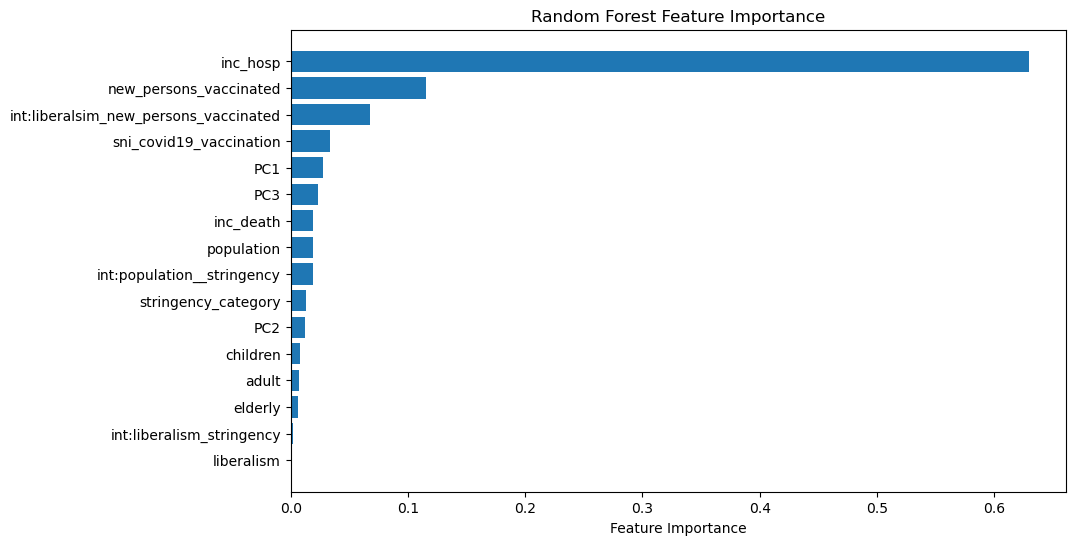

In [124]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### **EXTRA: Try to add human development index**

Human Development Index (HDI) is a composite index of life expectancy, education, and per capita income indicators.

In [125]:
HDI_df = pd.read_csv('GDL-Subnational-HDI-data.csv')

# Select only the necessary columns
HDI_df = HDI_df[['Region', '2021']].rename(columns={'Region': 'location_key', '2021': 'HDI'})
# Drop the first row (total HDI for the United States)
HDI_df = HDI_df.iloc[1:]
# Merge the HDI data with the original dataframe
df = pd.merge(df, HDI_df, on=['location_key'])

display(df)

,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,...,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,population,PC1,PC2,PC3,int:liberalism_stringency,int:liberalsim_new_persons_vaccinated,int:population__stringency,HDI
0,2021-01,Alabama,112124.0,1.371155,1.584112,0.032568,0.0,-0.231951,-0.237370,-0.199080,...,-0.403022,1.149867,-0.215768,-2.396417,-0.262114,-0.155315,0.0,-0.000000,-0.431537,0.881
1,2021-01,Alaska,8604.0,-0.537244,-0.539897,1.080654,1.0,-0.755107,-0.762349,-0.849780,...,-0.913240,1.939921,-0.215768,-3.198032,0.417148,0.067946,2.0,-0.390949,-0.431537,0.930
2,2021-01,Arizona,262750.0,2.366892,2.944381,1.492130,1.0,0.135100,0.059541,0.166176,...,-1.669627,2.105210,-0.215768,-3.498723,0.562954,-1.172292,3.0,0.209453,-0.647305,0.908
3,2021-01,Arkansas,80418.0,0.281742,0.466371,0.247917,0.0,-0.458891,-0.484278,-0.474223,...,-0.124464,1.092664,-0.215768,-2.131540,-0.503742,-0.223589,0.0,-0.000000,-0.431537,0.881
4,2021-01,California,1180351.0,10.206922,11.821532,1.098149,1.0,4.449814,4.491572,4.087480,...,-2.430059,2.871310,-0.215768,-5.161720,1.488413,-0.310348,3.0,3.105572,-0.647305,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2022-05,Virginia,14020.0,-0.454363,-0.552701,-1.122189,1.0,0.236426,0.291841,0.234678,...,0.714270,-0.306844,-0.098333,0.267299,-0.541798,0.473900,1.0,-0.437404,-0.098333,0.930
845,2022-05,Washington,15606.0,-0.449159,-0.567765,-1.059743,1.0,0.072436,0.117492,0.083914,...,0.423376,-1.012987,-0.098333,1.036421,-0.188725,0.518222,1.0,-0.468413,-0.098333,0.940
846,2022-05,West Virginia,1726.0,-0.538401,-0.567765,-1.298756,0.0,-0.653301,-0.637960,-0.615981,...,1.075490,-1.061277,-0.098333,1.681943,-1.320040,-0.813490,0.0,-0.000000,-0.098333,0.877
847,2022-05,Wisconsin,12420.0,-0.469590,-0.547429,-1.243454,0.0,-0.126976,-0.121213,-0.076975,...,1.386363,-1.342873,-0.098333,2.599836,-0.460601,0.817416,0.0,-0.000000,-0.098333,0.929


#### Define features

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_category', 'inc_death',
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'liberalism', 'population', 'HDI']]
y = df['inc_case']
sensitive_feature = df['liberalism']

#### Calculate Demographic Parity using StratifiedKFold

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions, true values, and sensitive features for each fold
y_pred_list = []
y_true_list = []
X_test_list = []
sensitive_feature_list = []

# List to store MAE for liberal and conservative states in each fold
liberal_mae_list = []
conservative_mae_list = []

# Loop through each fold of StratifiedKFold
for train_index, test_index in skf.split(X, sensitive_feature):

    # Split the data into training and testing sets for this fold
    # Ensures that each fold has a similar proportion of liberal and conservative states as the overall dataset
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Store X_test for this fold
    X_test_list.append(X_test)

    # Train RandomForestRegressor on the training data
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)
    y_pred_list.append(y_pred)
    y_true_list.append(y_test)
    sensitive_feature_list.append(sensitive_feature.iloc[test_index])

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into liberal and conservative states
    liberal_indices = X_test[sensitive_feature.iloc[test_index] == 1].index
    conservative_indices = X_test[sensitive_feature.iloc[test_index] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 37639.36053472932
Mean MAE for conservative (red) states: 21760.56272598615
Difference in MAE (liberal - conservative): 15878.79780874317


#### Calculate differences between evaluation metrics between liberal (blue) and conservative (red) states

In [128]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 19032144565.32499
Mean RMSE: 124743.82501276664
Mean Coverage: 0.9909346271705821
Mean Bias: -4810.777566394279

Metrics for Conservative (Red) States:
Mean MSE: 3745160836.91862
Mean RMSE: 55937.81002069176
Mean Coverage: 0.9926528154170431
Mean Bias: 7186.403420355315


In [129]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.903214e+10,3.745161e+09,1.528698e+10
1,RMSE,1.247438e+05,5.593781e+04,6.880601e+04
2,Coverage,9.909346e-01,9.926528e-01,-1.718188e-03
3,Bias,-4.810778e+03,7.186403e+03,-1.199718e+04


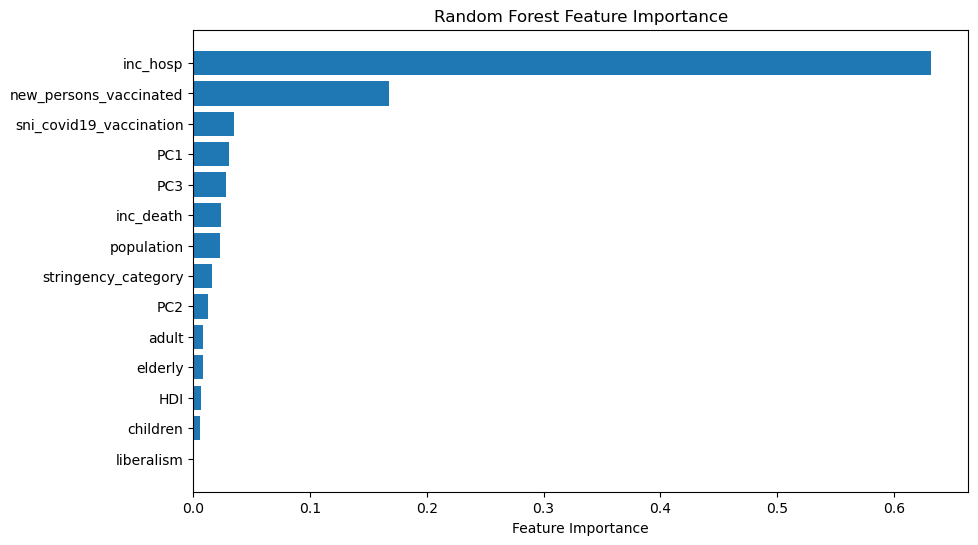

In [130]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

#### **EXTRA: Try to combine interaction variables, reweighting, and HDI**

In [131]:
# Define features and target variable
X = df[['sni_covid19_vaccination', 'new_persons_vaccinated', 'stringency_index', 'inc_death',
        'PC1', 'PC2', 'PC3', 'inc_hosp', 'children', 'adult', 'elderly', 'population', 'HDI',
        'int:liberalism_stringency', 'int:liberalsim_new_persons_vaccinated', 'int:population__stringency']]
y = df['inc_case']
sensitive_feature = df['liberalism']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store predictions and true values for each fold
y_pred_list = []
y_true_list = []
liberal_mae_list = []
conservative_mae_list = []

for train_index, test_index in skf.split(X, sensitive_feature):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Calculate the sample weights based on the training data
    liberal_count_train = sum(df.loc[X_train.index]['liberalism'] == 1)
    conservative_count_train = sum(df.loc[X_train.index]['liberalism'] == 0)

    liberal_weight_train = (1 / liberal_count_train) ** 0.5
    conservative_weight_train = (1 / conservative_count_train) ** 0.5

    # Assign sample weights
    sample_weight_train = np.array([liberal_weight_train if label == 1 else conservative_weight_train for label in df.loc[X_train.index]['liberalism']])
    
    # Train RandomForestRegressor with reweighting
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train, sample_weight=sample_weight_train)
    y_pred = rf_model.predict(X_test)

    y_pred_list.append(y_pred)
    y_true_list.append(y_test)

    # Convert y_pred to a pandas Series with the same index as y_test
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Separate the predictions into red and blue states
    liberal_indices = X_test[df.loc[X_test.index]['liberalism'] == 1].index
    conservative_indices = X_test[df.loc[X_test.index]['liberalism'] == 0].index

    # Calculate MAE for liberal (blue) states
    liberal_mae = mean_absolute_error(y_test.loc[liberal_indices], y_pred_series.loc[liberal_indices])
    liberal_mae_list.append(liberal_mae)

    # Calculate MAE for conservative (red) states
    conservative_mae = mean_absolute_error(y_test.loc[conservative_indices], y_pred_series.loc[conservative_indices])
    conservative_mae_list.append(conservative_mae)

# Calculate the mean and standard deviation of the MAEs
mean_liberal_mae = np.mean(liberal_mae_list)
mean_conservative_mae = np.mean(conservative_mae_list)
mae_difference = mean_liberal_mae - mean_conservative_mae

print(f"Mean MAE for liberal (blue) states: {mean_liberal_mae}")
print(f"Mean MAE for conservative (red) states: {mean_conservative_mae}")
print(f"Difference in MAE (liberal - conservative): {mae_difference}")

Mean MAE for liberal (blue) states: 37458.5832854954
Mean MAE for conservative (red) states: 21381.924840710628
Difference in MAE (liberal - conservative): 16076.65844478477


In [132]:
# Lists to store evaluation metrics for liberal and conservative states in each fold
liberal_mse_list = []
liberal_rmse_list = []
liberal_coverage_list = []
liberal_bias_list = []

conservative_mse_list = []
conservative_rmse_list = []
conservative_coverage_list = []
conservative_bias_list = []

# Loop through each fold of StratifiedKFold
for fold_idx, (train_index, test_index) in enumerate(skf.split(X, sensitive_feature)):
    # Get predictions from the first part
    y_pred = y_pred_list[fold_idx]
    y_test = y_true_list[fold_idx]
    sensitive_feature = sensitive_feature_list[fold_idx]

    # Calculate RMSE, coverage, and bias for liberal and conservative states
    liberal_indices = sensitive_feature == 1
    conservative_indices = sensitive_feature == 0

    liberal_mse = mean_squared_error(y_test[liberal_indices], y_pred[liberal_indices])
    liberal_rmse = np.sqrt(liberal_mse)
    liberal_coverage, liberal_bias = calculate_coverage_bias(y_test[liberal_indices], y_pred[liberal_indices])

    conservative_mse = mean_squared_error(y_test[conservative_indices], y_pred[conservative_indices])
    conservative_rmse = np.sqrt(conservative_mse)
    conservative_coverage, conservative_bias = calculate_coverage_bias(y_test[conservative_indices], y_pred[conservative_indices])

    # Append evaluation metrics to the corresponding lists
    liberal_mse_list.append(liberal_mse)
    liberal_rmse_list.append(liberal_rmse)
    liberal_coverage_list.append(liberal_coverage)
    liberal_bias_list.append(liberal_bias)

    conservative_mse_list.append(conservative_mse)
    conservative_rmse_list.append(conservative_rmse)
    conservative_coverage_list.append(conservative_coverage)
    conservative_bias_list.append(conservative_bias)

# Calculate the mean and standard deviation of the evaluation metrics
mean_liberal_mse = np.mean(liberal_mse_list)
mean_liberal_rmse = np.mean(liberal_rmse_list)
mean_liberal_coverage = np.mean(liberal_coverage_list)
mean_liberal_bias = np.mean(liberal_bias_list)

mean_conservative_mse = np.mean(conservative_mse_list)
mean_conservative_rmse = np.mean(conservative_rmse_list)
mean_conservative_coverage = np.mean(conservative_coverage_list)
mean_conservative_bias = np.mean(conservative_bias_list)

# Print the results
print("Metrics for Liberal (Blue) States:")
print("Mean MSE:", mean_liberal_mse)
print("Mean RMSE:", mean_liberal_rmse)
print("Mean Coverage:", mean_liberal_coverage)
print("Mean Bias:", mean_liberal_bias)
print("\nMetrics for Conservative (Red) States:")
print("Mean MSE:", mean_conservative_mse)
print("Mean RMSE:", mean_conservative_rmse)
print("Mean Coverage:", mean_conservative_coverage)
print("Mean Bias:", mean_conservative_bias)

Metrics for Liberal (Blue) States:
Mean MSE: 19186254749.549126
Mean RMSE: 125085.64149131309
Mean Coverage: 0.9931818181818182
Mean Bias: -3644.445164964248

Metrics for Conservative (Red) States:
Mean MSE: 3885979804.452234
Mean RMSE: 56478.716732220375
Mean Coverage: 0.9926528154170431
Mean Bias: 5407.854578139113


In [133]:
# Create a DataFrame to store the mean evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'Coverage', 'Bias'],
    'Liberal (Blue) States': [mean_liberal_mse, mean_liberal_rmse, mean_liberal_coverage, mean_liberal_bias],
    'Conservative (Red) States': [mean_conservative_mse, mean_conservative_rmse, mean_conservative_coverage, mean_conservative_bias]
})

metrics_df['Difference'] = metrics_df['Liberal (Blue) States'] - metrics_df['Conservative (Red) States']

# Print the DataFrame
display(metrics_df)

,Metric,Liberal (Blue) States,Conservative (Red) States,Difference
0,MSE,1.918625e+10,3.885980e+09,1.530027e+10
1,RMSE,1.250856e+05,5.647872e+04,6.860692e+04
2,Coverage,9.931818e-01,9.926528e-01,5.290028e-04
3,Bias,-3.644445e+03,5.407855e+03,-9.052300e+03
